# <p style="text-align:center;">Supervisado</p>

**Todo ejercicio debe tener un análisis fundamentado en la teoría vista en la materia, dicho análisis sera parte del informe a entregar en pdf**

<span style="color:blue">*Se recomienda hacer uso de las herramientas vistas en los demos de la materia.*</span>

**Objetivos:** 
- Implementar los modelos random forest y redes neuronales para clasificar las galaxias en tipo Elípticas y Espirales e Irregulares
- Comparar la performance obtenida con los modelos vistos en el anterior práctico y los nuevos modelos de este práctico.

# Paquetes necesarios 

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = (10,6)

# Data set

Se continua con el dataset previamente curado y usado en el anterior práctico. 
Las variables físicas que caracterizan a las galaxias son:
- **distancia_L**: Es la distancia a la galaxia, su calculo hace uso del brillo de la galaxia
- **Mag_abs**: Es el brillo que tendría la galaxia a una distancia fija (10 Mpc)
- **objID**: Es el id de las galaxias
- **rac y dec** = Posición angular, rac de 0 a 360 y dec de -90 a 90
- **modelMag_u,modelMag_g, modelMag_r,modelMag_i,modelMag_z**= Estas variables representan una fracción de la luz total que observamos de las galaxias según su frecuencia (como por ejemplo, la frecuencia de radio, para más información [wiki](https://es.wikipedia.org/wiki/Espectro_visible))
- **petroR90_r** = Es una medida del tamaño de la galaxia
- **color**= Como su nombre lo indica es el color más predominante en la galaxia
- **elíptica, espiral, irregular**= Estas columnas identifican el tipo de morfología de las galaxias. Si el valor de una de estas tres columnas es 1, entonces la galaxia tiene esa morfología y las dos restantes tendrán el valor 0. 


In [4]:
dataset=pd.read_csv('galaxias_2.csv')
display(dataset.head(2))
display(dataset.shape)

,objID,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,Color,elliptical,spiral,uncertain,distancia_L,Mag_abs
0,1.237674e+18,119.822479,42.008528,17.36539,15.46586,14.54658,14.07490,13.69937,18.121160,-2.818807,1.0,0.0,0.0,135.131916,-21.191136
1,1.237674e+18,118.185239,33.699089,19.95136,18.35397,17.54043,17.05026,16.71222,3.657189,-2.410933,0.0,0.0,1.0,153.893111,-18.473102


(32623, 15)

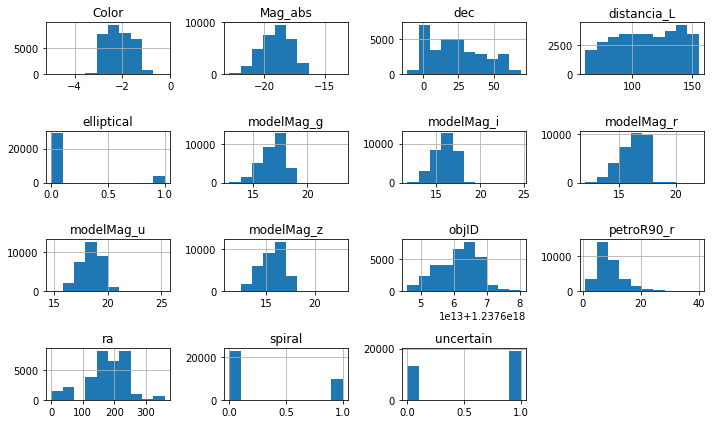

In [5]:
dataset.hist()
plt.tight_layout()

In [6]:
data_cl = dataset.loc[~(dataset.index.astype(str).duplicated(keep="first"))]
data_cl.drop("objID",axis=1, inplace=True)

# Target

Usen como Target la clase de tipo morfológico de las galaxias.

In [9]:
data_cl["Type"] = (data_cl["spiral"] * 0 + data_cl["elliptical"] * 1 +\
                  data_cl["uncertain"] * 2).map({0: "S", 1: "E", 2: "U"})
#data_cl["Type"] = data_cl["Type"].map({0: "S", 1: "E", 2: "U"})

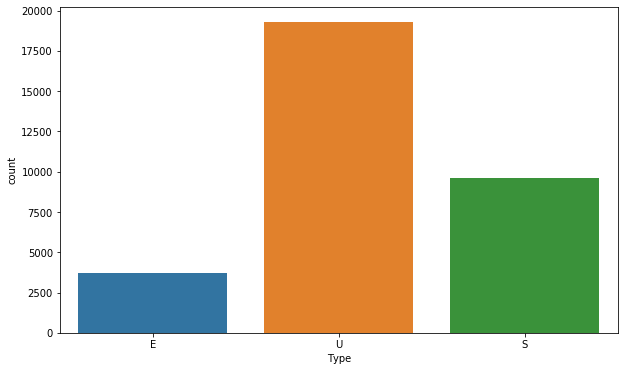

In [10]:
sns.countplot(data_cl["Type"])

In [11]:
def print_classification_report(y_real, y_pred):
    print(f"Accuracy {accuracy_score(y_real, y_pred)}")
    print("-"*100)
    print(classification_report(y_real, y_pred))
    plt.figure()
    sns.heatmap(confusion_matrix(y_real, y_pred), 
                #xticklabels=x_ticks, #[0, 1],
                #yticklabels=x_ticks, #[0, 1],
                cmap="jet",
                annot=True,
               )
    plt.xlabel("Predicted Class")
    plt.ylabel("Real Class")
    plt.show()

# División en entrenamiento y evaluación
   - Realizar la respectiva división conjunto de *train* y *test*.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
data_cl.columns

Index(['ra', 'dec', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i',
       'modelMag_z', 'petroR90_r', 'Color', 'elliptical', 'spiral',
       'uncertain', 'distancia_L', 'Mag_abs', 'Type'],
      dtype='object')

In [14]:
X = data_cl.drop(["Type", "uncertain", "spiral", "elliptical"], axis=1)
y = data_cl["Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

feature3 = ["petroR90_r","Color","Mag_abs"]
X_train_3ft, X_test_3ft, = X_train[feature3] , X_test[feature3]

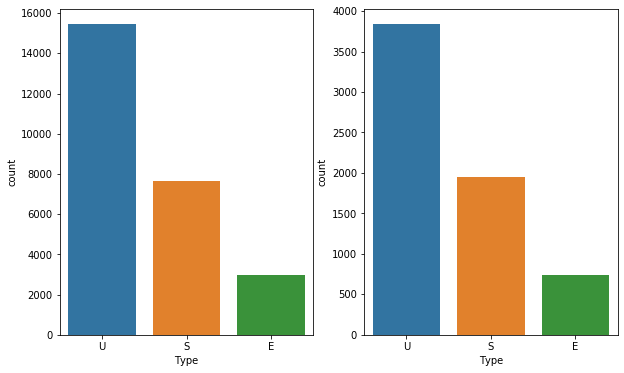

In [15]:
f, axs = plt.subplots(1,2)
sns.countplot(y_train, order=["U","S","E"], ax=axs[0])
sns.countplot(y_test, order=["U","S","E"], ax=axs[1])

# Radom Forest

- Entrenar el modelo Random Forest, variando los parámetros del mismo, para cada modelo:
    - Imprimir el *out-of-bag score* cuando se usan todos los features del dataset 
    - Imprimir el *out-of-bag score* usando como atributos petroR90_r, Color y Mag_abs
    - Que pueden decir de las puntuaciones obtenidas.
    - Elijan la métrica que crean más propiedad para este problema y compare con los modelos vistos en el anterior práctico.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
rf_clf = RandomForestClassifier(oob_score=True, random_state=421)

## Parametros por defecto

/home/franco/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/franco/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/franco/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/franco/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Train
--------------------------------------------------------------------------------
Accuracy 0.9886198176105448
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           E       0.98      0.98      0.98      2991
           S       0.99      0.99      0.99      7659
           U       0.99      0.99      0.99     15448

    accuracy                           0.99     26098
   macro avg       0.99      0.99      0.99     26098
weighted avg       0.99      0.99      0.99     26098



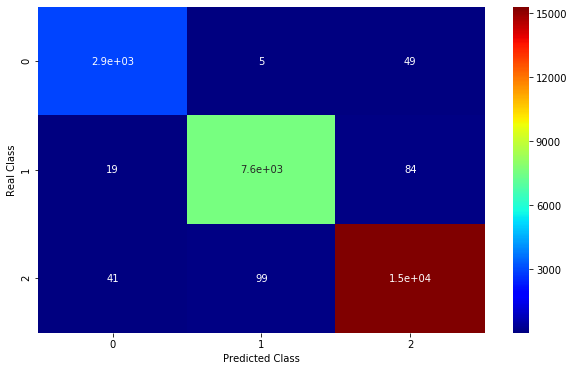

--------------------------------------------------------------------------------
Test
--------------------------------------------------------------------------------
Accuracy 0.7175478927203065
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           E       0.54      0.51      0.52       738
           S       0.67      0.65      0.66      1949
           U       0.77      0.79      0.78      3838

    accuracy                           0.72      6525
   macro avg       0.66      0.65      0.66      6525
weighted avg       0.71      0.72      0.72      6525



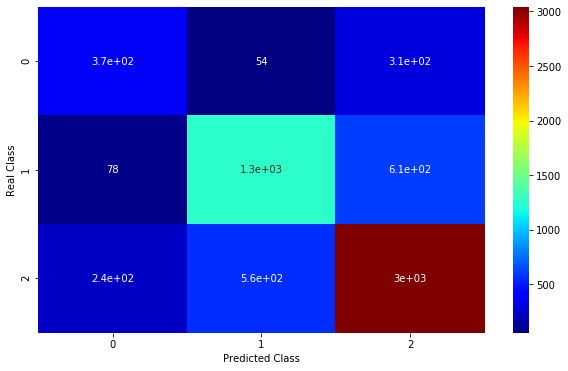

In [18]:
rf_clf.fit(X_train, y_train)
y_pred_train = rf_clf.predict(X_train)
y_pred_test  = rf_clf.predict(X_test)
print("Train")
print("-"*80)
print_classification_report(y_train, y_pred_train)
print("-"*80)
print("Test")
print("-"*80)
print_classification_report(y_test, y_pred_test)

De estos resultados es evidente que el modelo esta overfiteando los datos de entrenamiento. Vemos que pasa con el OOB Score

In [19]:
rf_clf.oob_score_

0.6768334738294122

## Ajuste de Hiper Parametros

### Todos los Features

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
param_grid = [
    #{"n_estimators": [10, 50, 80, 100], "max_features": [2, 4, 6, 8, 10, 12],
    #"criterion": ["gini", "entropy"], "min_samples_split": [2,3,4,5]}
    {"n_estimators": [90, 100], "max_features": [4,5,7],
    "min_samples_leaf": [3,4,5]}
]

rf_clf = RandomForestClassifier(oob_score=True, random_state=421,)
grid_search = GridSearchCV(rf_clf, param_grid, cv=3, scoring="accuracy", n_jobs=6, verbose=3)

In [22]:
grid_search.fit(X_train, y_train)
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in sorted(zip(means, stds, grid_search.cv_results_['params']), 
                                key=lambda data: data[0], reverse=True):
    print("%0.4f (+/-%0.04f) para %r" % (mean, std * 2, params))

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:   57.9s
[Parallel(n_jobs=6)]: Done  54 out of  54 | elapsed:  3.1min finished


0.7322 (+/-0.0059) para {'max_features': 5, 'min_samples_leaf': 3, 'n_estimators': 90}
0.7319 (+/-0.0049) para {'max_features': 5, 'min_samples_leaf': 3, 'n_estimators': 100}
0.7317 (+/-0.0082) para {'max_features': 4, 'min_samples_leaf': 3, 'n_estimators': 90}
0.7308 (+/-0.0051) para {'max_features': 4, 'min_samples_leaf': 3, 'n_estimators': 100}
0.7305 (+/-0.0083) para {'max_features': 7, 'min_samples_leaf': 3, 'n_estimators': 100}
0.7298 (+/-0.0084) para {'max_features': 4, 'min_samples_leaf': 5, 'n_estimators': 100}
0.7296 (+/-0.0043) para {'max_features': 5, 'min_samples_leaf': 4, 'n_estimators': 100}
0.7296 (+/-0.0092) para {'max_features': 7, 'min_samples_leaf': 3, 'n_estimators': 90}
0.7292 (+/-0.0082) para {'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 90}
0.7291 (+/-0.0066) para {'max_features': 4, 'min_samples_leaf': 5, 'n_estimators': 90}
0.7286 (+/-0.0091) para {'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 100}
0.7281 (+/-0.0084) para {'max_feature

Train
--------------------------------------------------------------------------------
Accuracy 0.959881983293739
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           E       0.98      0.87      0.92      2991
           S       0.97      0.93      0.95      7659
           U       0.95      0.99      0.97     15448

    accuracy                           0.96     26098
   macro avg       0.97      0.93      0.95     26098
weighted avg       0.96      0.96      0.96     26098



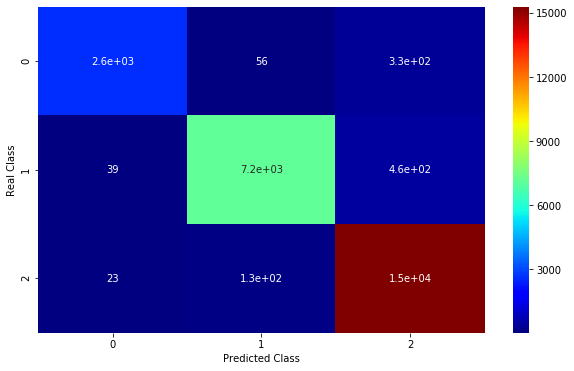

--------------------------------------------------------------------------------
Test
--------------------------------------------------------------------------------
Accuracy 0.7388505747126437
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           E       0.62      0.44      0.51       738
           S       0.72      0.62      0.67      1949
           U       0.76      0.86      0.80      3838

    accuracy                           0.74      6525
   macro avg       0.70      0.64      0.66      6525
weighted avg       0.73      0.74      0.73      6525



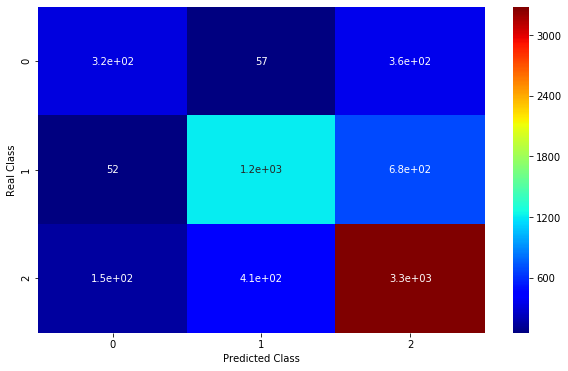

OOB
--------------------------------------------------------------------------------
0.7407464173499885


In [35]:
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

y_pred_train = best_rf.predict(X_train)
y_pred_test  = best_rf.predict(X_test)
print("Train")
print("-"*80)
print_classification_report(y_train, y_pred_train)
print("-"*80)
print("Test")
print("-"*80)
print_classification_report(y_test, y_pred_test)
print("OOB")
print("-"*80)
print(best_rf.oob_score_)

In [37]:
list(sorted(zip(X_train.columns, best_rf.feature_importances_), 
            key=lambda x: x[1], reverse=True))

[('petroR90_r', 0.22044114230564854),
 ('Color', 0.13237370872471377),
 ('modelMag_z', 0.09444818373159049),
 ('modelMag_g', 0.07542600277026862),
 ('modelMag_i', 0.07259851021225941),
 ('Mag_abs', 0.07213036299760474),
 ('modelMag_r', 0.07194402818142252),
 ('ra', 0.0669366463262414),
 ('distancia_L', 0.06684548038066468),
 ('dec', 0.06510886115400306),
 ('modelMag_u', 0.06174707321558266)]

### petroR90_r, Color, y Mag_abs

In [29]:
param_grid = [
    #{"n_estimators": [10, 50, 80, 100], "max_features": [2, 4, 6, 8, 10, 12],
    #"criterion": ["gini", "entropy"], "min_samples_split": [2,3,4,5]}
    {"n_estimators": [90, 100], "max_features": [1,2,3],
    "min_samples_leaf": [3,4,5]}
]

rf_clf = RandomForestClassifier(oob_score=True, random_state=421,)
grid_search_3f = GridSearchCV(rf_clf, param_grid, cv=3, scoring="accuracy", n_jobs=6, verbose=3)

In [30]:
grid_search_3f.fit(X_train_3ft, y_train)
means = grid_search_3f.cv_results_['mean_test_score']
stds = grid_search_3f.cv_results_['std_test_score']
for mean, std, params in sorted(zip(means, stds, grid_search_3f.cv_results_['params']), 
                                key=lambda data: data[0], reverse=True):
    print("%0.4f (+/-%0.04f) para %r" % (mean, std * 2, params))

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:   24.2s
[Parallel(n_jobs=6)]: Done  54 out of  54 | elapsed:  2.0min finished


0.7063 (+/-0.0092) para {'max_features': 1, 'min_samples_leaf': 3, 'n_estimators': 100}
0.7056 (+/-0.0081) para {'max_features': 1, 'min_samples_leaf': 3, 'n_estimators': 90}
0.7040 (+/-0.0071) para {'max_features': 1, 'min_samples_leaf': 4, 'n_estimators': 90}
0.7035 (+/-0.0060) para {'max_features': 1, 'min_samples_leaf': 4, 'n_estimators': 100}
0.7030 (+/-0.0071) para {'max_features': 2, 'min_samples_leaf': 3, 'n_estimators': 100}
0.7029 (+/-0.0083) para {'max_features': 2, 'min_samples_leaf': 3, 'n_estimators': 90}
0.7024 (+/-0.0029) para {'max_features': 1, 'min_samples_leaf': 5, 'n_estimators': 90}
0.7018 (+/-0.0035) para {'max_features': 1, 'min_samples_leaf': 5, 'n_estimators': 100}
0.7016 (+/-0.0074) para {'max_features': 3, 'min_samples_leaf': 3, 'n_estimators': 100}
0.7015 (+/-0.0073) para {'max_features': 3, 'min_samples_leaf': 3, 'n_estimators': 90}
0.7006 (+/-0.0089) para {'max_features': 2, 'min_samples_leaf': 4, 'n_estimators': 100}
0.7005 (+/-0.0093) para {'max_feature

Train
--------------------------------------------------------------------------------
Accuracy 0.9076174419495747
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           E       0.92      0.74      0.82      2991
           S       0.93      0.84      0.89      7659
           U       0.89      0.97      0.93     15448

    accuracy                           0.91     26098
   macro avg       0.92      0.85      0.88     26098
weighted avg       0.91      0.91      0.91     26098



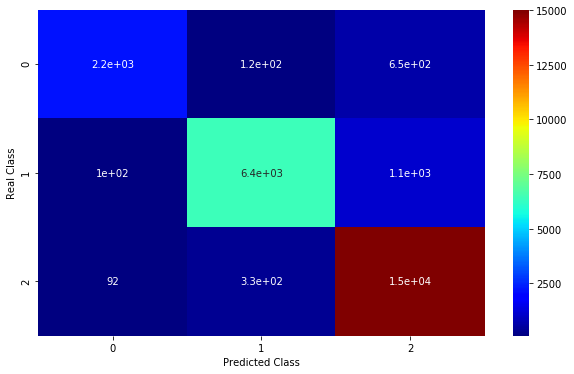

--------------------------------------------------------------------------------
Test
--------------------------------------------------------------------------------
Accuracy 0.7062068965517241
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           E       0.57      0.40      0.47       738
           S       0.67      0.55      0.61      1949
           U       0.74      0.84      0.79      3838

    accuracy                           0.71      6525
   macro avg       0.66      0.60      0.62      6525
weighted avg       0.70      0.71      0.70      6525



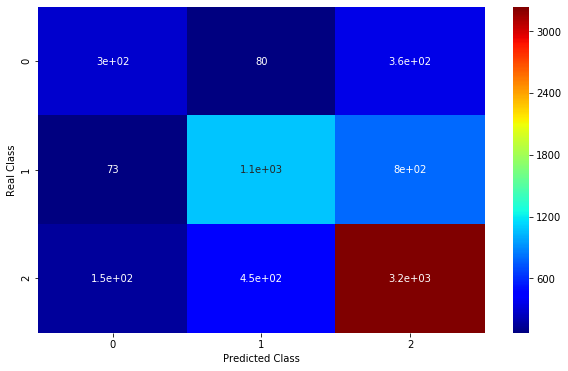

OOB
--------------------------------------------------------------------------------
0.710820752548088


In [33]:
best_rf_3f = grid_search_3f.best_estimator_
best_rf_3f.fit(X_train_3ft, y_train)

y_pred_train = best_rf_3f.predict(X_train_3ft)
y_pred_test  = best_rf_3f.predict(X_test_3ft)
print("Train")
print("-"*80)
print_classification_report(y_train, y_pred_train)
print("-"*80)
print("Test")
print("-"*80)
print_classification_report(y_test, y_pred_test)
print("OOB")
print("-"*80)
print(best_rf_3f.oob_score_)

In [38]:
list(sorted(zip(X_train_3ft.columns, best_rf_3f.feature_importances_), 
            key=lambda x: x[1], reverse=True))

[('petroR90_r', 0.3914490783505787),
 ('Color', 0.30462515936873447),
 ('Mag_abs', 0.3039257622806869)]

El accuracy no cambia tanto ya que pertroR90_r, Color y Mag_abs son de las variables más importantes en el modelo

# Neural Networks

Implemente el modelo visto en el demo 8 de la materia (*neural_network.MLPClassifier*). 
Varié algunos de sus parámetros excepto el parámetro *solver* el cual deben fijar en función de la dimensión del dataset.

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [40]:
X = data_cl.drop(["Type", "uncertain", "spiral", "elliptical"], axis=1)
y = data_cl["Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std   = std.transform(X_test)

In [42]:
from sklearn import neural_network

In [43]:
param_grid = [
    {"hidden_layer_sizes": [(8,2), (8,3), (8,4), (9,3), (9,2)],
     "alpha": [1e-5,1e-4]
    }
]

mlp_clf = neural_network.MLPClassifier(solver='adam', activation="logistic", 
                                       random_state=532, max_iter=1000)
mlp_gs = GridSearchCV(mlp_clf, param_grid, cv=3, scoring="accuracy", n_jobs=6, verbose=3)
mlp_gs.fit(X_train_std, y_train)

means = mlp_gs.cv_results_['mean_test_score']
stds = mlp_gs.cv_results_['std_test_score']
for mean, std, params in sorted(zip(means, stds, mlp_gs.cv_results_['params']), 
                                key=lambda data: data[0], reverse=True):
    print("%0.4f (+/-%0.04f) para %r" % (mean, std * 2, params))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  30 out of  30 | elapsed:  3.4min remaining:    0.0s
[Parallel(n_jobs=6)]: Done  30 out of  30 | elapsed:  3.4min finished


0.7147 (+/-0.0105) para {'alpha': 0.0001, 'hidden_layer_sizes': (9, 2)}
0.7146 (+/-0.0106) para {'alpha': 1e-05, 'hidden_layer_sizes': (9, 2)}
0.7117 (+/-0.0146) para {'alpha': 1e-05, 'hidden_layer_sizes': (9, 3)}
0.7116 (+/-0.0143) para {'alpha': 0.0001, 'hidden_layer_sizes': (9, 3)}
0.7101 (+/-0.0136) para {'alpha': 0.0001, 'hidden_layer_sizes': (8, 3)}
0.7101 (+/-0.0136) para {'alpha': 1e-05, 'hidden_layer_sizes': (8, 3)}
0.7099 (+/-0.0124) para {'alpha': 1e-05, 'hidden_layer_sizes': (8, 4)}
0.7091 (+/-0.0145) para {'alpha': 0.0001, 'hidden_layer_sizes': (8, 4)}
0.7087 (+/-0.0125) para {'alpha': 0.0001, 'hidden_layer_sizes': (8, 2)}
0.7086 (+/-0.0128) para {'alpha': 1e-05, 'hidden_layer_sizes': (8, 2)}


Train
--------------------------------------------------------------------------------
Accuracy 0.7168748563108284
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           E       0.56      0.38      0.45      2991
           S       0.69      0.61      0.65      7659
           U       0.75      0.83      0.79     15448

    accuracy                           0.72     26098
   macro avg       0.67      0.61      0.63     26098
weighted avg       0.71      0.72      0.71     26098



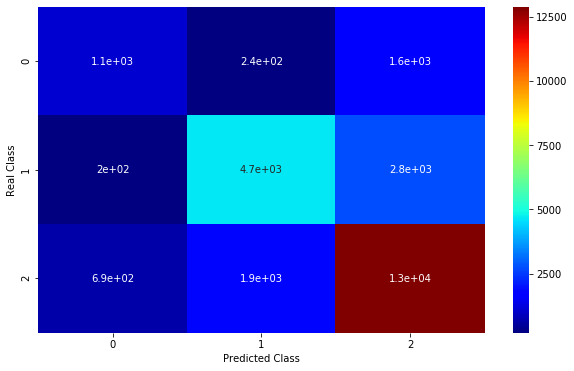

--------------------------------------------------------------------------------
Test
--------------------------------------------------------------------------------
Accuracy 0.717088122605364
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           E       0.58      0.36      0.45       738
           S       0.69      0.61      0.65      1949
           U       0.74      0.84      0.79      3838

    accuracy                           0.72      6525
   macro avg       0.67      0.60      0.63      6525
weighted avg       0.71      0.72      0.71      6525



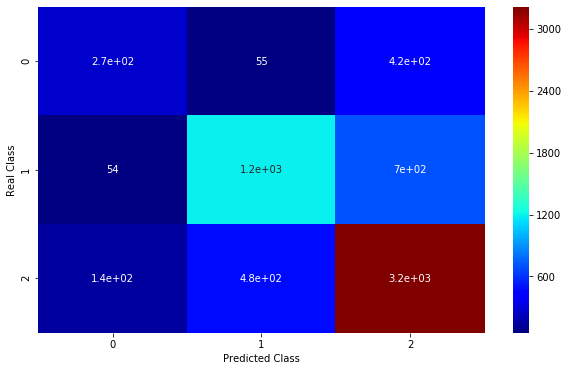

In [44]:
best_mlp = mlp_gs.best_estimator_
best_mlp.fit(X_train_std, y_train)

y_pred_train = best_mlp.predict(X_train_std)
y_pred_test  = best_mlp.predict(X_test_std)
print("Train")
print("-"*80)
print_classification_report(y_train, y_pred_train)
print("-"*80)
print("Test")
print("-"*80)
print_classification_report(y_test, y_pred_test)